# aSPEM Experiment : analysis


Test de différtentes pentes $k$ pour la relation entre $p_bet$ et $\hat{p}$


In [1]:
%run ../0_parameters.ipynb


WELCOME



In [2]:
import glob
import bayesianchangepoint as bcp

In [3]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)

In [4]:
from aSPEM import Analysis
e = Analysis(name_file_fit='fct_velocity_sigmo')

In [5]:
def sigmoid(y):
    return 1 / (1 + np.exp(-y))
def logit(p):
    return np.log(p / (1 - p))

/home/phantom/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/phantom/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


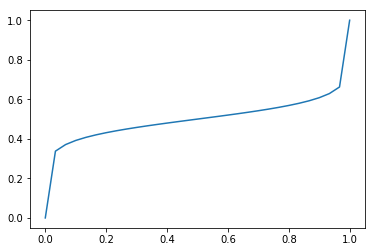

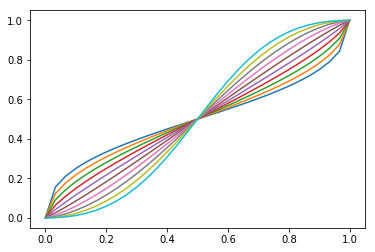

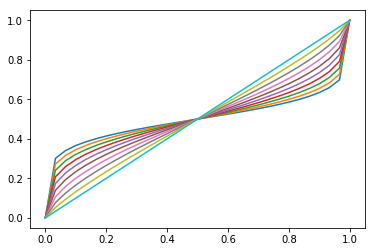

In [6]:
p = np.linspace(0, 1, 31)
plt.plot(p, sigmoid(.2*logit(p)))
plt.show()

for k in np.logspace(-1, 1, 10, base=2):
    plt.plot(p, sigmoid(k*logit(p)))
plt.show()

for k in np.logspace(-2, 0, 10, base=2):
    plt.plot(p, sigmoid(k*logit(p)))
plt.show()

In [7]:
def r_(p, data) :
    
    p = np.ma.masked_array(p, mask=np.isnan(data)).compressed()
    data = np.ma.masked_array(data, mask=np.isnan(data)).compressed()

    from scipy import stats
    slope, intercept, r_, p_value, std_err = stats.linregress(p, data)
    
    return r_

In [8]:
def find_h_r(recording, pourcentage=0.99) :
    Full = e.Full_list(modes_bcp=[])
    modes_bcp = 'mean'
    list_h = recording['list_h']

    r_k_s, h_k_s = {}, {}
    for num, s in enumerate(list(set(Full.sujet))):
        print(s, end=' ')

        bet = Full['results'][Full.sujet==s].values.tolist()
        x = np.array(Full['bino'][Full.sujet==s].values.tolist())

        r_k, h_k = [], []
        for k in range(11) : r_k.append([]) ; h_k.append([])

        for num, k in enumerate(np.logspace(-1, 1, 10, base=2)) :

            r_bet_l, r_bet_ = recording['r_bet_k'][s][k], recording['r_bet_k'][s]['sslogit']

            if num==0 :
                #r_k[0]=np.max(r_bet_)
                #h_k[0]=list_h[np.argmax(r_bet_)]   
                if np.argmax(r_bet_)==len(list_h)-1 : #pourcentage
                    for x in range(len(r_bet_)) :
                        if np.round(r_bet_[x], 4)==np.round(pourcentage*np.max(r_bet_), 4) :
                            r_k[0]=r_bet_[x]
                            h_k[0]=list_h[x]
                else : 
                    r_k[0]=np.max(r_bet_)
                    h_k[0]=list_h[np.argmax(r_bet_)]

            #r_k[num+1]=np.max(r_bet_l)
            #h_k[num+1]=list_h[np.argmax(r_bet_l)]
            if np.argmax(r_bet_l)==len(list_h)-1 : #pourcentage
                for x in range(len(r_bet_l)) :
                    if np.round(r_bet_l[x], 4)==np.round(pourcentage*np.max(r_bet_l), 4) :
                        r_k[num+1]=r_bet_l[x]
                        h_k[num+1]=list_h[x]
            else : 
                r_k[num+1]=np.max(r_bet_l)
                h_k[num+1]=list_h[np.argmax(r_bet_l)]

        h_k_s[s], r_k_s[s] = h_k, r_k
    return h_k_s, r_k_s

Plot de R en fonction de la pente

In [9]:
def fig_R_pente(h_k_s, r_k_s) :
    fig, ax = plt.subplots(1,2,figsize=(2*10,10))

    list_k = np.logspace(-1, 1, 10, base=2)
    print('\n\t\tsans logit|avec logit (max r)\n')
    print('-'*85)

    for num, s in enumerate(h_k_s.keys()) :
        h_k, r_k = np.array(h_k_s[s]), np.array(r_k_s[s])

        r_m   = np.max(r_k)
        arg_m = np.argmax(r_k)
        h_m   = h_k[arg_m]

        if arg_m==0 : k_m = 1
        else :       k_m = list_k[arg_m-1]

        print('%s\tk:\t         |%.3f'%(s, k_m))
        print('\th(tau):\t%.3f(%.0f)|%.3f(%.0f)'%(h_k[0], 1/h_k[0], h_m, 1/h_m))
        print('\tr:\t%.3f    |%.3f'%(r_k[0], r_m))
        print('-'*85)

        ax[0].plot(list_k, r_k[1:])
        ax[1].plot(list_k, h_k[1:])

    ax[0].set_ylim(-0.1, 1.1)
    ax[1].set_ylim(-0.01, 0.31)

    ax[0].set_title('R') ; ax[1].set_title('H')
    ax[0].set_ylabel('R') ; ax[1].set_ylabel('H')
    for a in range(2) : ax[a].legend() ; ax[a].set_xlabel('pente')
    plt.show()

In [10]:
def plot_R(recording, list_x, xlabel, pourcentage=0.99):
    Full = e.Full_list(modes_bcp=[])

    fig, ax = plt.subplots(4,3,figsize=(3*5,4*5))

    r_k_s, h_k_s = {}, {}
    for num_s, s in enumerate(list(set(Full.sujet))):
        print(s, end=' ')

        a, b = num_s//3, num_s%3

        r_k, h_k = [], []
        for k in range(11) : r_k.append([]) ; h_k.append([])

        for num, k in enumerate(np.logspace(-1, 1, 10, base=2)) :

            r_bet_l, r_bet_ = recording['r_bet_k'][s][k], recording['r_bet_k'][s]['sslogit']

            if num==0 : ax[a][b].plot(list_x, r_bet_, lw=1)
            ax[a][b].plot(list_x, r_bet_l, lw=1)

            if xlabel=='tau' :
                if s in ['AM', 'SR']:
                    if num==0 :
                        print(np.max(r_bet_), list_x[np.argmax(r_bet_)])
                        p = np.round(pourcentage*np.max(r_bet_), 4)
                        for x in range(len(r_bet_)) :
                            if np.round(r_bet_[x], 4)==p :
                                print('p', p,'x', x, list_x[x])
                        ax[a][b].hlines(p, 0,600)

        ax[a][b].set_title(s, fontsize=20)
        ax[a][b].set_ylim(0,1)
        ax[a][b].set_ylabel('r', fontsize=15)
        ax[a][b].set_xlabel(xlabel, fontsize=15)
    plt.tight_layout()
    plt.show()

YK IP SR FM CS OP TN BMC RS LB DC AM 

No handles with labels found to put in legend.
No handles with labels found to put in legend.



		sans logit|avec logit (max r)

-------------------------------------------------------------------------------------
YK	k:	         |0.583
	h(tau):	0.028(36)|0.032(31)
	r:	0.678    |0.680
-------------------------------------------------------------------------------------
IP	k:	         |0.500
	h(tau):	0.015(67)|0.016(62)
	r:	0.932    |0.948
-------------------------------------------------------------------------------------
SR	k:	         |2.000
	h(tau):	0.005(186)|0.005(208)
	r:	0.877    |0.888
-------------------------------------------------------------------------------------
FM	k:	         |0.500
	h(tau):	0.056(18)|0.053(19)
	r:	0.795    |0.809
-------------------------------------------------------------------------------------
CS	k:	         |0.500
	h(tau):	0.125(8)|0.111(9)
	r:	0.735    |0.742
-------------------------------------------------------------------------------------
OP	k:	         |0.500
	h(tau):	0.050(20)|0.059(17)
	r:	0.786    |0.794
------------------------

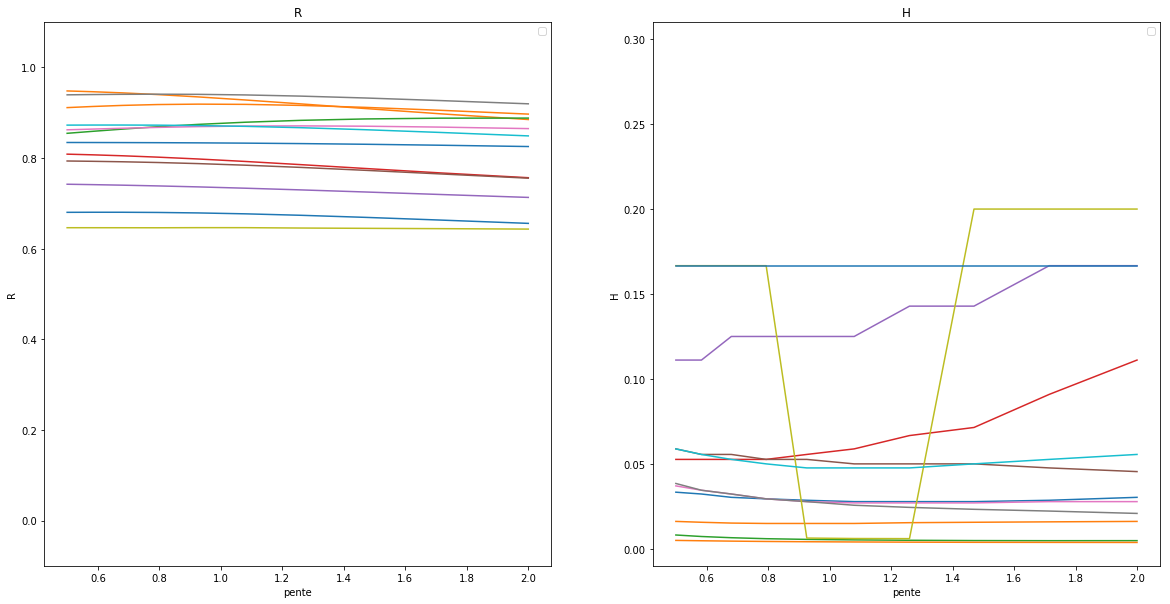

YK IP SR 0.885707200728995 600.0
p 0.8769 x 184 185.0
p 0.8769 x 185 185.99999999999997
FM CS OP TN BMC RS LB DC AM 0.9283441419926637 600.0
p 0.9191 x 243 244.0
p 0.9191 x 244 244.99999999999997


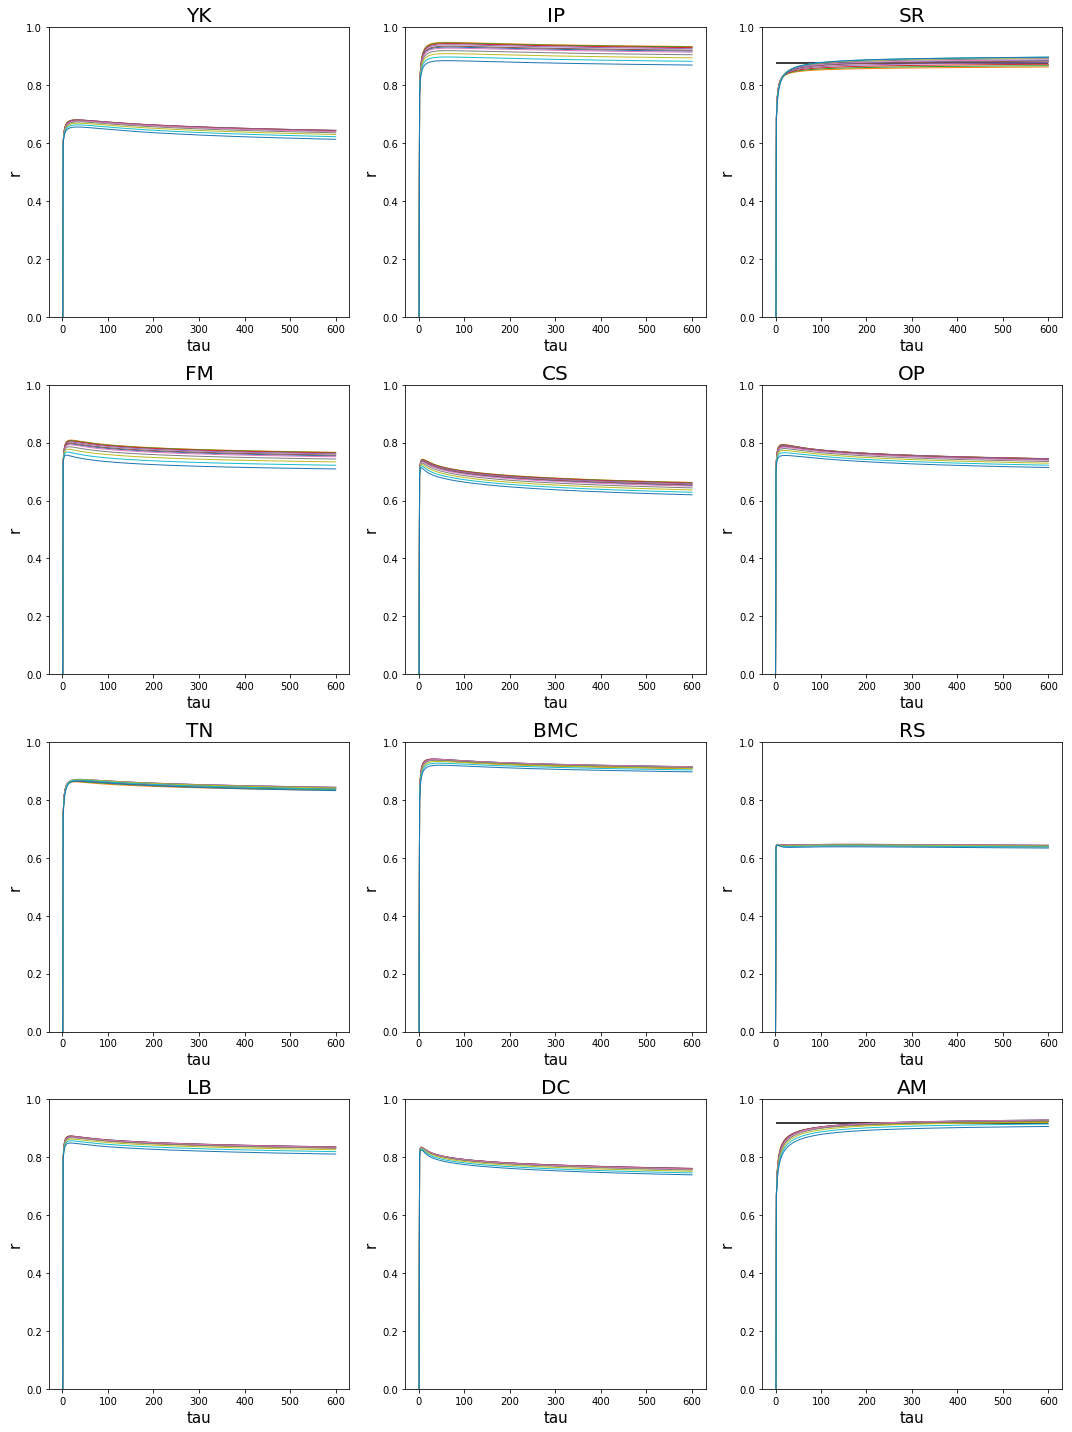

YK IP SR FM CS OP TN BMC RS LB DC AM 

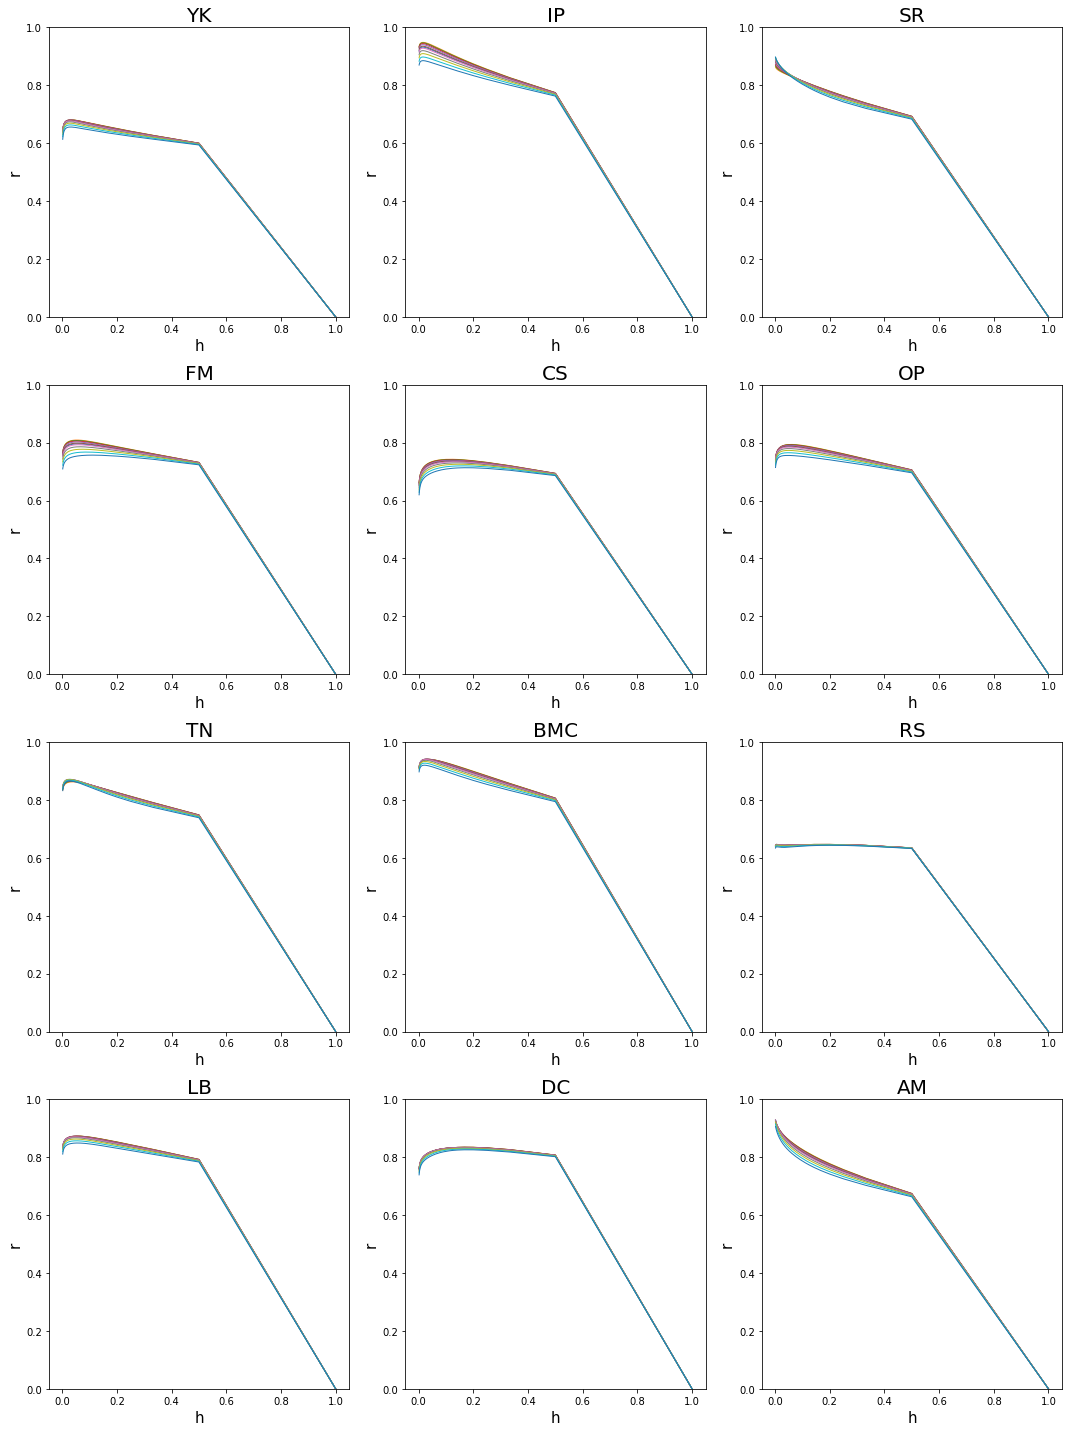

In [11]:
import pickle
file = os.path.join('parametre', 'list_r_bet_logit_600.pkl')
with open(file, 'rb') as fichier:
    recording = pickle.load(fichier, encoding='latin1')
    
    
h_k_s, r_k_s = find_h_r(recording)
fig_R_pente(h_k_s, r_k_s)
plot_R(recording, 1/recording['list_h'], 'tau') 
plot_R(recording, recording['list_h'], 'h') 

YK IP SR FM CS OP TN BMC RS LB DC AM 

No handles with labels found to put in legend.
No handles with labels found to put in legend.



		sans logit|avec logit (max r)

-------------------------------------------------------------------------------------
YK	k:	         |0.794
	h(tau):	0.022(45)|0.024(41)
	r:	0.672    |0.672
-------------------------------------------------------------------------------------
IP	k:	         |0.500
	h(tau):	0.016(64)|0.021(47)
	r:	0.914    |0.922
-------------------------------------------------------------------------------------
SR	k:	         |2.000
	h(tau):	0.003(309)|0.003(399)
	r:	0.857    |0.876
-------------------------------------------------------------------------------------
FM	k:	         |0.500
	h(tau):	0.067(15)|0.062(16)
	r:	0.782    |0.794
-------------------------------------------------------------------------------------
CS	k:	         |0.500
	h(tau):	0.125(8)|0.111(9)
	r:	0.720    |0.727
-------------------------------------------------------------------------------------
OP	k:	         |0.500
	h(tau):	0.059(17)|0.067(15)
	r:	0.771    |0.778
------------------------

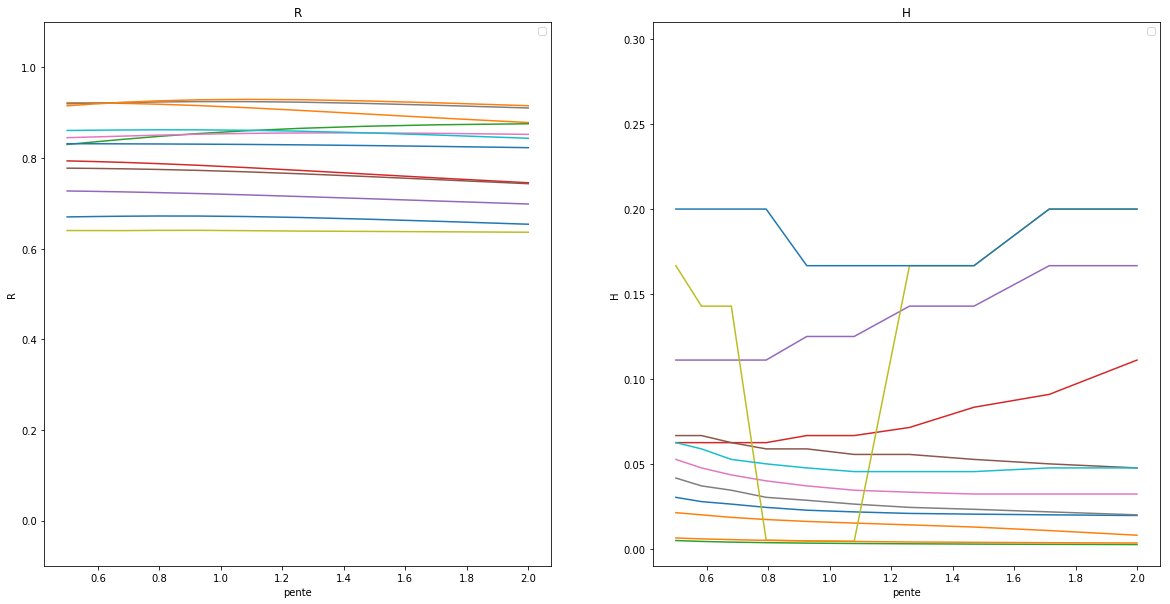

YK IP SR 0.857262031646397 309.0
p 0.8487 x 71 72.0
FM CS OP TN BMC RS LB DC AM 0.9387214465621625 600.0
p 0.9293 x 222 223.0
p 0.9293 x 223 224.0


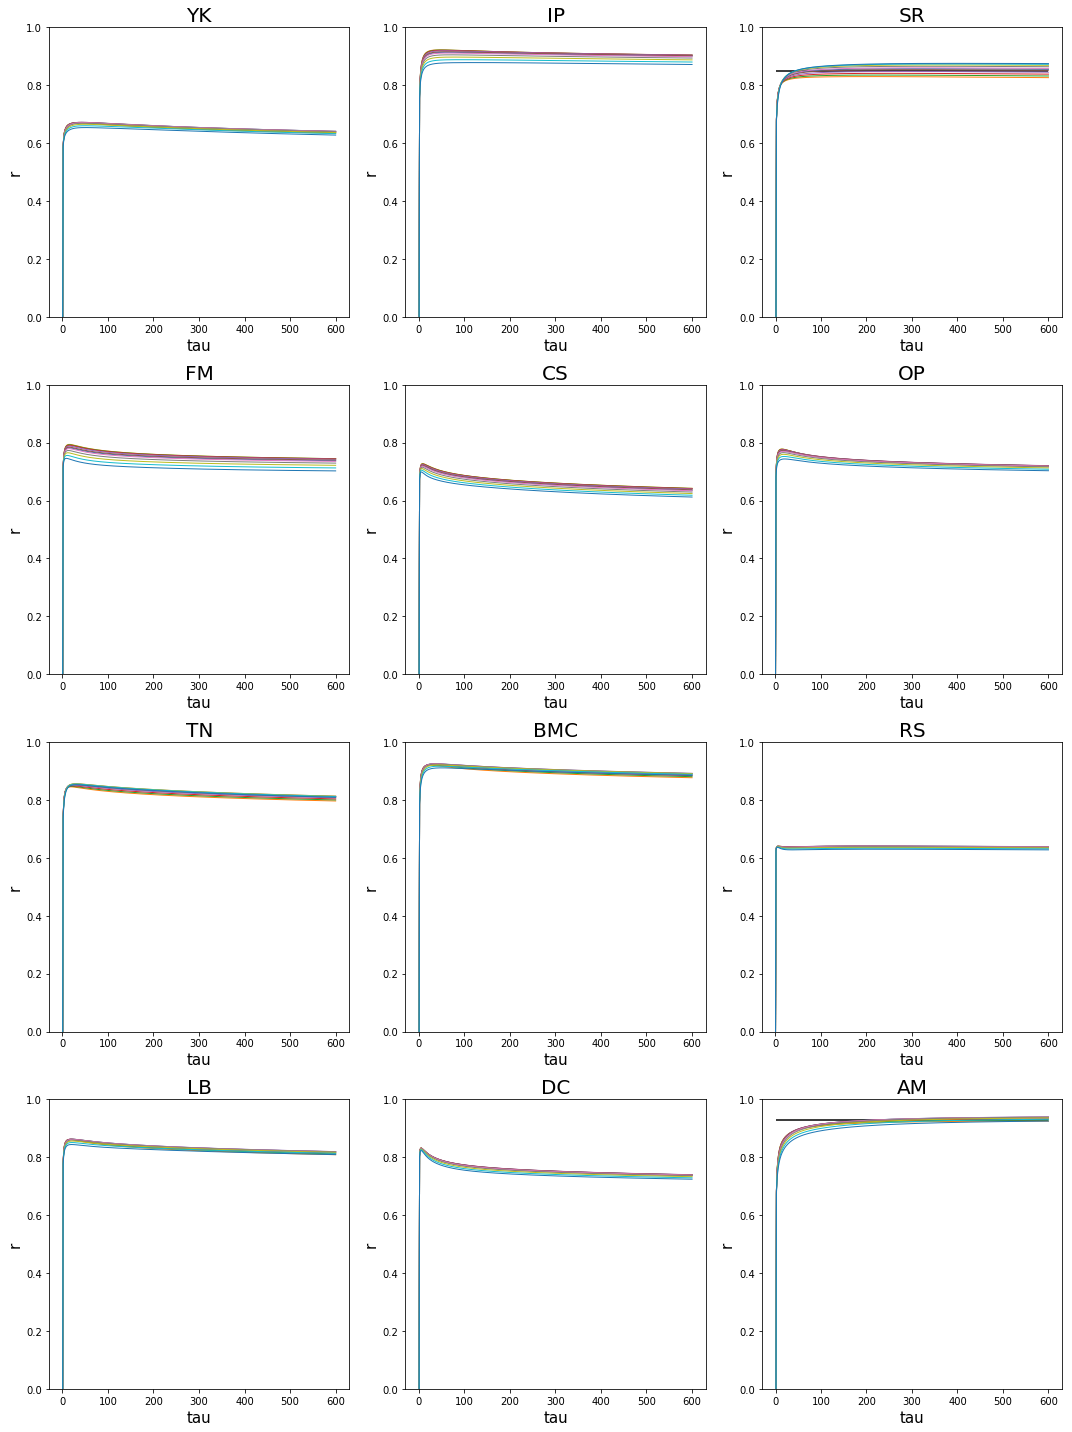

YK IP SR FM CS OP TN BMC RS LB DC AM 

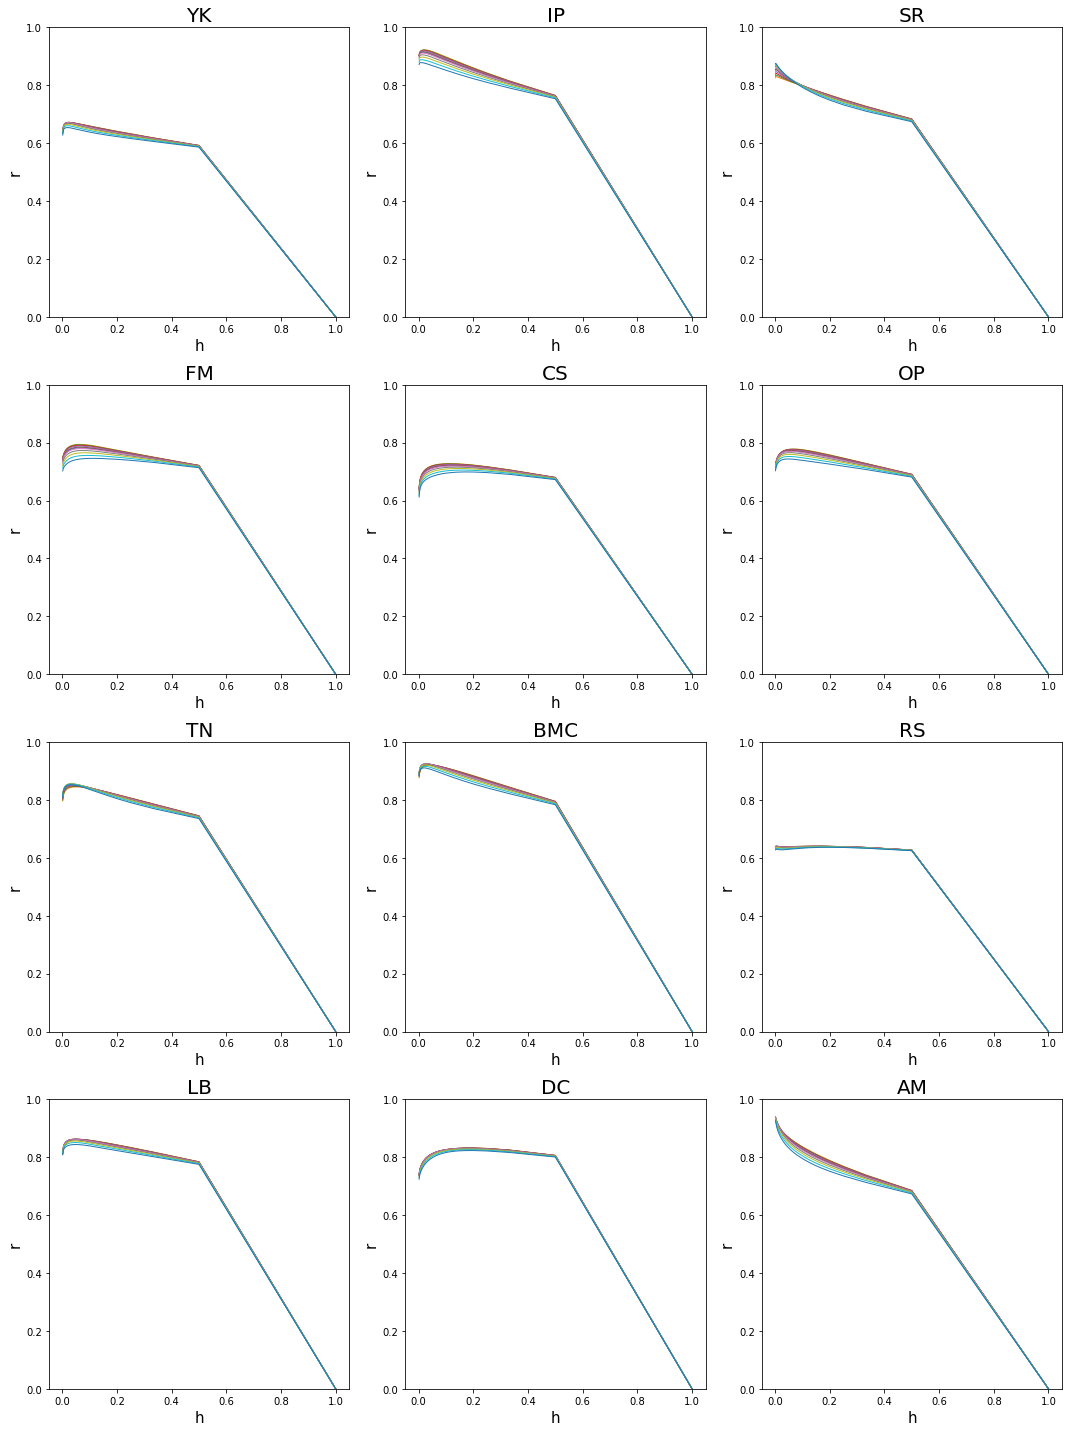

In [12]:
import pickle
file = os.path.join('parametre', 'list_r_bet_logit_600_ss_pauses.pkl')
with open(file, 'rb') as fichier:
    recording = pickle.load(fichier, encoding='latin1')
    
    
h_k_s, r_k_s = find_h_r(recording)
fig_R_pente(h_k_s, r_k_s)
plot_R(recording, 1/recording['list_h'], 'tau') 
plot_R(recording, recording['list_h'], 'h') 